#Exercises: Statistical Moments and Normality Testing

## Lecture Link : 
https://www.quantopian.com/lectures/statistical-moments

###IMPORTANT NOTE: 
This lecture corresponds to the Statistical Moments and Normality Testing lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

In [9]:
# Useful Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from yahoofinancials import YahooFinancials
from statsmodels.stats.stattools import jarque_bera

---

# Exercise 1: Testing for Skew

## a. Artificial Example

Use the results from the `stats.skew` function to determine the skew of the artificial distribution named X. 

0.26474831096388496


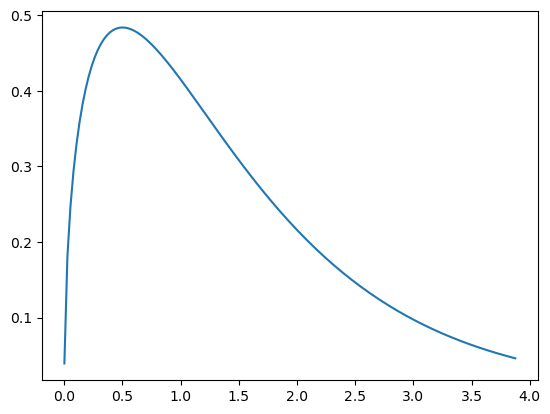

In [6]:
xs2 = np.linspace(stats.gamma.ppf(0.01, 0.7, loc=-1), stats.gamma.ppf(0.99, 0.7, loc=-1), 150) + 1

X = stats.gamma.pdf(xs2, 1.5)

#Your code goes here

print(stats.skew(X))

plt.plot(xs2,X);

## b. Real Example

Use the results from the `stats.skew` function to determine the skew of the returns of NFLX and use it to make a conclusion about the symmetry of the stock's returns. 

In [7]:
# Replacement of quantopian function for YahooFinance function
def get_pricing(ticker, fields='close', start_date='2005-01-01', end_date='2010-01-01'):
    yf = YahooFinancials(ticker)
    ticker_price_info = yf.get_historical_price_data(start_date, end_date, 'daily')
    return pd.DataFrame(ticker_price_info[ticker]['prices'])[fields]

In [10]:
start = '2015-01-01'
end = '2016-01-01'
pricing = get_pricing('NFLX', fields='close', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

In [18]:
import statsmodels.api as sm

In [17]:
stats.skew(returns)

1.8460554584124012

In [19]:
sm.stats.stattools.jarque_bera(returns)

(1108.159161156197,
 2.324318396973032e-241,
 1.8460554584124012,
 12.608733458788484)

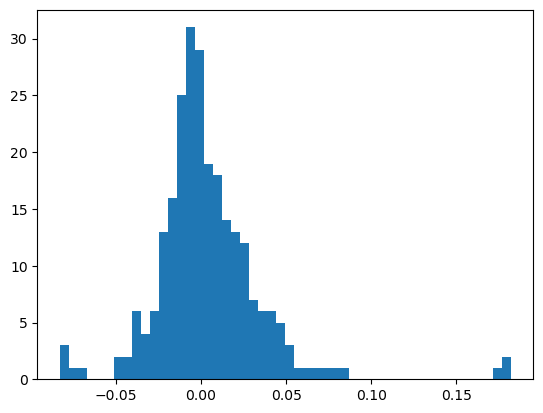

In [15]:
plt.hist(returns, bins=50);

---

# Exercise 2: Testing for Kurtosis

## a. Artificial Example

Use the results from the `stats.kurtosis` function to determine the excess kurtosis of the artificial distribution named Y. 

In [20]:
xs = np.linspace(-6,6, 300) + 2 

Y = stats.cosine.pdf(xs)

#Your code goes here

In [21]:
stats.kurtosis(xs)

-1.200026666962966

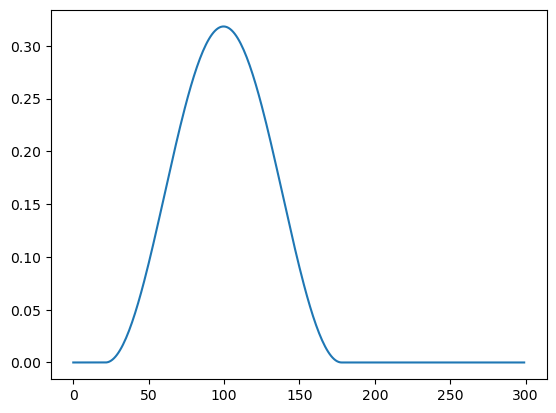

In [22]:
plt.plot(Y)

## b. Real Example

Use the results from the `stats.kurtosis` function to determine the kurtosis of the returns of NFLX and use it to make a conclusion about the volatility of the stock's price.

In [23]:
start = '2015-01-01'
end = '2016-01-01'
pricing = get_pricing('NFLX', fields='close', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

In [24]:
sm.stats.stattools.jarque_bera(returns)

(1108.159161156197,
 2.324318396973032e-241,
 1.8460554584124012,
 12.608733458788484)

<Axes: >

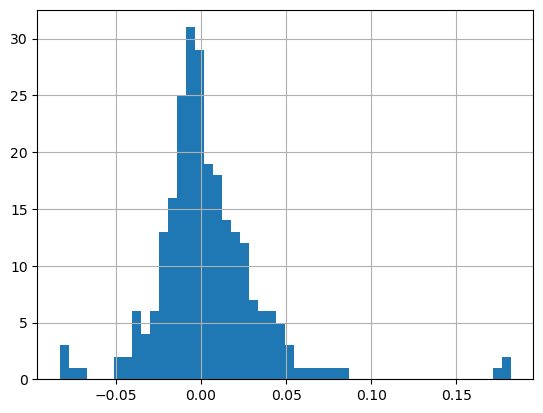

In [25]:
returns.hist(bins=50)

---

# Exercise 3: Skew and Normality

## a. Artificial Example II

Use the results from the `stats.skew` function to determine the skew of the artificial distribution named Z. 

In [41]:
xs2 = np.linspace(stats.lognorm.ppf(0.01, 0.7, loc=-.1), stats.lognorm.ppf(0.99, 0.7, loc=-.1), 150)

lognorm = stats.lognorm.pdf(xs2, 0.4)

Z = lognorm/2 + lognorm[::-1]

#Your code goes here

print(stats.skew(Z))

1.1121491036049675


## b. Jarque-Bera Calibration

Ensure that the `jarque-bera` function is calibrated by running it on many trials of simulated data and ensuring that the sample probability that the test returns a result under the p-value is equal to the p-value.

In [35]:
N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution
    X = np.random.normal(0,1,M)
    _,p,_,_ = sm.stats.stattools.jarque_bera(X)
    pvalues[i]=p

# Number of times we reject null hypothesis
len(pvalues[pvalues<0.05])/len(pvalues) 

0.052

## c. Jarque-Bera Test

Use the `Jarque-Bera` function to determine the normality of Z.

In [38]:
#Your code goes here
sm.stats.stattools.jarque_bera(Z)[1]

1.6768991741743843e-07

Reject null hypothesis = `Z` was not drawn from a normal distribution

## d. Skewness and Normality

Plot Z and observe that skewness is not informative unless the underlying distribution is somewhat normal.

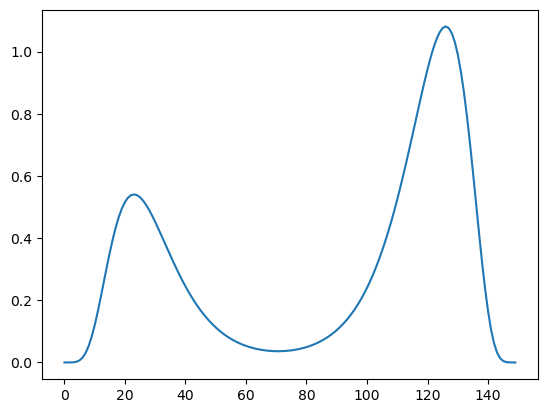

In [40]:
#Your code goes here
plt.plot(Z);

---

# Exercise 4: Out of Sample Test

## a. Testing for Normality

Plot a histogram of the historical returns of AMC to ensure it is unimodal and vaguely normal before testing it for skewness in part b.

In [42]:
start = '2014-01-01'
end = '2016-01-01'
pricing = get_pricing('AMC', fields='close', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

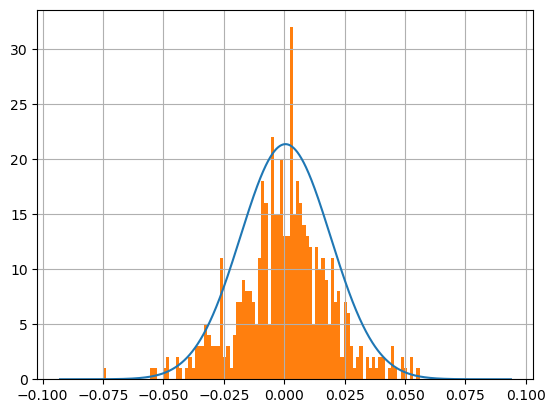

In [78]:
mu, sd = returns.mean(), returns.std()
X = np.linspace(mu-5*sd, mu+5*sd, 1000)
plt.plot(X,stats.norm.pdf(X,mu,sd))
plt.hist(returns, bins=100)
plt.grid();

## b. Test for Skew

Find the skew of the historical returns of AMC between 2014 to 2016. 

In [79]:
start = '2014-01-01'
end = '2016-01-01'
pricing = get_pricing('AMC', fields='close', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

In [80]:
stats.skew(returns)

-0.14167298486970067

## c. Out of Sample Test

Find the skew of the historical retunrs of AMC from the first half of 2016 to determine if the skew from part b holds outside of the original sample.

In [81]:
start = '2016-01-01'
end = '2016-07-01'
out_pricing = get_pricing('AMC', fields='close', start_date=start, end_date=end)
out_returns = out_pricing.pct_change()[1:]

#Your code goes 
stats.skew(out_returns)

1.031302311747122

## d. Rolling Skew

Plot the rolling skew of AMC using the `pd.rolling_skew` function. 

In [82]:
AMC = get_pricing('AMC', fields='close', start_date='2015-01-01', end_date='2017-01-01')

#Your code goes here

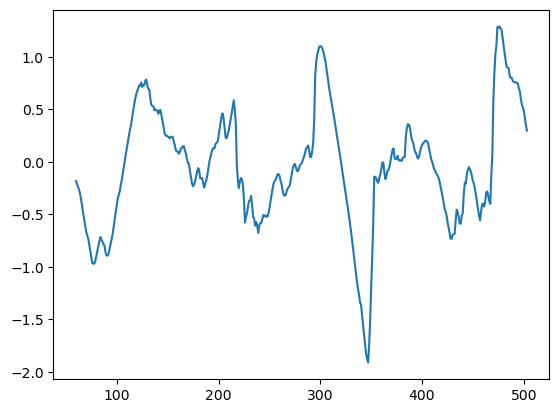

In [89]:
window = 60
plt.plot(AMC.rolling(window=window).skew()[window:]);

---

Congratulations on completing the Statistical Moments and Normality Testing exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*